In [6]:
# !pip3 install pandas
!pip install matplotlib

In [8]:
import pandas as pd
data=pd.read_csv('./clean_indiana_reports.csv')
projections=pd.read_csv('./indiana_projections.csv')
augmented_projections=pd.read_csv('./augmented_project.csv')
#merging to get images corresponding to uids
projections['filename']=projections['filename'].apply(lambda x: f'./images/images_normalized/{x}')
augmented_projections['filename']=augmented_projections['filename'].apply(lambda x: f'./augmen_images/{x}')
jdata_1=pd.merge(data,projections,on='uid')
jdata_2=pd.merge(data,augmented_projections,on='uid')
jdata_1['impression'].value_counts()

impression
No acute cardiopulmonary abnormality.                                                                                                           585
No acute cardiopulmonary findings.                                                                                                              222
No acute cardiopulmonary abnormalities.                                                                                                         219
No active disease.                                                                                                                              218
No acute disease.                                                                                                                               207
                                                                                                                                               ... 
1. No acute cardiopulmonary abnormalities. 2. Vague left upper lobe nodular density as described abov

In [2]:
jdata_2['Problems'].value_counts()

Problems
Atherosclerosis                                                                                                              95
Calcified Granuloma;Aorta, Thoracic;Atherosclerosis                                                                          90
Calcinosis;Calcinosis;Lung;Diaphragm;Spine                                                                                   90
Atherosclerosis;Catheters, Indwelling;Implanted Medical Device                                                               90
Aorta;Implanted Medical Device                                                                                               90
                                                                                                                             ..
Calcified Granuloma;Granulomatous Disease                                                                                    48
Cardiac Shadow;Cardiomegaly                                                                    

In [7]:
jdata_1[jdata_1['Problems']!='normal']

,Unnamed: 0,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
2,1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,./images/images_normalized/2_IM-0652-1001.dcm.png,Frontal
3,1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,./images/images_normalized/2_IM-0652-2001.dcm.png,Lateral
4,3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,./images/images_normalized/4_IM-2050-1001.dcm.png,Frontal
5,3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,./images/images_normalized/4_IM-2050-2001.dcm.png,Lateral
6,4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,./images/images_normalized/5_IM-2117-1003002.d...,Frontal
...,...,...,...,...,...,...,...,...,...,...,...
6464,3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...,./images/images_normalized/3995_IM-2046-2001.d...,Lateral
6465,3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,./images/images_normalized/3996_IM-2047-1001.d...,Frontal
6466,3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,./images/images_normalized/3996_IM-2047-3001.d...,Lateral
6467,3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB.",./images/images_normalized/3997_IM-2048-1001.d...,Frontal


In [4]:
from PIL import Image

for idx,row in jdata_1.iterrows():
    new_string=""
    if(".dcm" in row['filename']):
        new_string=row['filename'].replace(".dcm","")
    else:
        new_string=row['filename']

    file_path=new_string
    try:
        img = Image.open(file_path)
        img.load()

        ## do the work with the loaded image
    except:
        print(file_path)




./images/images_normalized/2276_IM-0863-1001-0002.png


In [5]:
import sys
for idx,row in jdata_2.iterrows():
    new_string=""
    if(".dcm" in row['filename']):
        new_string=row['filename'].replace(".dcm","")
    else:
        new_string=row['filename']

    file_path=new_string
    try:
        img = Image.open(file_path)
        img.load()

        ## do the work with the loaded image
    except:
        print('error:',sys.exc_info()[0])
        print(file_path)

error: <class 'FileNotFoundError'>
./augmen_images/2570_IM-1073-1001-103.png
error: <class 'FileNotFoundError'>
./augmen_images/3116_IM-1464-2001-24.png


In [6]:
print(len(jdata_2))

19791


In [18]:
reports[reports['filename']==fileName]['findings'].iloc[0]

'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.'

In [6]:
fileName


'1_IM-0001-3001.png'

In [1]:
#notebook for testing different parts of code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reports=pd.read_csv("./indiana_reports.csv")
projections=pd.read_csv("./indiana_projections.csv")
reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [2]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3851 entries, 0 to 3850
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         3851 non-null   int64 
 1   MeSH        3851 non-null   object
 2   Problems    3851 non-null   object
 3   image       3851 non-null   object
 4   indication  3765 non-null   object
 5   comparison  2685 non-null   object
 6   findings    3337 non-null   object
 7   impression  3820 non-null   object
dtypes: int64(1), object(7)
memory usage: 240.8+ KB


In [3]:
reports["findings"].isna().sum()

514

In [4]:
projections.head()

,uid,filename,projection
0,1,1_IM-0001-4001.dcm.png,Frontal
1,1,1_IM-0001-3001.dcm.png,Lateral
2,2,2_IM-0652-1001.dcm.png,Frontal
3,2,2_IM-0652-2001.dcm.png,Lateral
4,3,3_IM-1384-1001.dcm.png,Frontal


In [5]:
vc=projections["uid"].value_counts()
uids_1=[key for key,value in zip(vc.keys(),vc.values) if value==1] #uids using a single image for report
len(uids_1)
# list(vc.values).count(1)

446

In [6]:
clean_reports=reports.dropna(axis=0,subset=['findings'])
clean_reports.shape
clean_reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.


In [7]:
print(clean_reports['impression'].value_counts())

impression
No acute cardiopulmonary abnormality.                                                                                                                             301
No active disease.                                                                                                                                                116
No acute cardiopulmonary abnormalities.                                                                                                                           112
No acute cardiopulmonary findings.                                                                                                                                111
No acute disease.                                                                                                                                                 109
                                                                                                                                                               

In [8]:
clean_reports['findings'].value_counts()

findings
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.                                                                                                                                        51
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.                                                                                                                                                                          51
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.                                                                                                                           46
The lungs are clear bilaterally. Specifically, no evidence of focal consolidation, pneumothorax, or pleural effusion.. Cardio mediastinal silhouette is unremarkable. Visualized osseous structures of the thorax are without acut

In [9]:
xx= clean_reports['Problems'].value_counts()
# for i in xx:
#     print(xx[i])
print(xx)

Problems
normal                                                      1197
No Indexing                                                   87
Lung                                                          79
Calcified Granuloma                                           72
Thoracic Vertebrae                                            59
                                                            ... 
Pulmonary Atelectasis;Foreign Bodies;Density                   1
Calcified Granuloma;Lung;Markings                              1
Lung;Opacity;Markings                                          1
Hernia, Diaphragmatic;Bone Diseases, Metabolic;Deformity       1
Opacity;Granuloma                                              1
Name: count, Length: 1244, dtype: int64


In [10]:
print(clean_reports['Problems'].value_counts().sum)

<bound method Series.sum of Problems
normal                                                      1197
No Indexing                                                   87
Lung                                                          79
Calcified Granuloma                                           72
Thoracic Vertebrae                                            59
                                                            ... 
Pulmonary Atelectasis;Foreign Bodies;Density                   1
Calcified Granuloma;Lung;Markings                              1
Lung;Opacity;Markings                                          1
Hernia, Diaphragmatic;Bone Diseases, Metabolic;Deformity       1
Opacity;Granuloma                                              1
Name: count, Length: 1244, dtype: int64>


In [11]:


# Filter the counts where value is equal to 1
print(len(xx[xx == 1]))

1088


In [12]:
class_counts = clean_reports['Problems'].value_counts()

# Filter classes with only one occurrence
single_occurrence_classes = class_counts[class_counts == 2].index.tolist()
print(len(single_occurrence_classes))
# pd.set_option('display.max_rows', None)
print(class_counts['Osteophyte'])

63
15


In [13]:
clean_reports[clean_reports['Problems']=='No Indexing']

,uid,MeSH,Problems,image,indication,comparison,findings,impression
38,39,No Indexing,No Indexing,"CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",diminished breath sounds throughout,"XXXX, XXXX.",The heart and lungs have XXXX XXXX in the inte...,No active disease.
42,43,No Indexing,No Indexing,"CHEST 2V FRONTAL/LATERAL XXXX, XXXX XXXX PM",dyspnea,"XXXX, XXXX.",The heart and lungs have XXXX XXXX in the inte...,No active disease.
123,125,No Indexing,No Indexing,Xray Chest PA and Lateral,LYMPHOMA BMT W/U LAB;,XXXX,The heart is normal in size. The mediastinum i...,No acute disease.
146,150,No Indexing,No Indexing,"PA and Lateral Chest: XXXX, XXXX at 952 XXXX",XXXX-year-old female without chest complaints....,NaN,"Heart size, mediastinal contour, and pulmonary...",1. No acute cardiopulmonary abnormality. 2. No...
147,151,No Indexing,No Indexing,CHEST 2V FRONTAL/LATERAL XXXX,chest pain,"XXXX, XXXX.",The heart and lungs have XXXX XXXX in the inte...,No active disease.
...,...,...,...,...,...,...,...,...
3784,3932,No Indexing,No Indexing,PA and Lateral chest radiograph (2 views),XXXX and XXXX sweats.,None.,The cardiac silhouette mediastinal contours ar...,No acute cardiopulmonary disease.
3785,3933,No Indexing,No Indexing,Xray Chest PA and Lateral,XXXX-year-old female with XXXX and syncope,NaN,The heart size is normal. No pneumothorax. No ...,No acute cardiopulmonary abnormalities. .
3811,3959,No Indexing,No Indexing,Xray Chest PA and Lateral,XXXX S/P XXXX XXXX. Aortic stenosis,Chest 2 views. XXXX.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...
3817,3965,No Indexing,No Indexing,CHEST 2V FRONTAL/LATERAL XXXX,XXXX,"XXXX, XXXX.",The heart and lungs have XXXX XXXX in the inte...,No active disease.


In [14]:
clean_reports

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.
...,...,...,...,...,...,...,...,...
3844,3993,Cardiomegaly/mild;Diaphragm/left/elevated,Cardiomegaly;Diaphragm,CHEST 2V FRONTAL/LATERAL,Edema,NaN,The heart is mildly enlarged. Left hemidiaphra...,Borderline cardiomegaly without acute disease.
3845,3994,Cardiomegaly/mild;Pulmonary Congestion;Heart F...,Cardiomegaly;Pulmonary Congestion;Heart Failure,2 view ( PA and lateral) chest radiograph date...,"XXXX-year-old male with chest pain, positive t...","Portable chest x-XXXX XXXX, XXXX",Similar mild cardiomegaly. Of the pulmonary va...,Mild cardiomegaly with XXXX of early failure.
3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...


In [15]:
clean_uids=list(clean_reports['uid'])
set1=set(uids_1)
set2=set(clean_uids)
uids=list(set2.intersection(set1))
len(uids)


382

In [16]:
clean_reports.to_csv("./clean_indiana_reports.csv")

In [17]:
df_new=pd.merge(clean_reports,projections, on='uid')
df_new.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
4,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,Frontal


In [18]:
aug_p=pd.read_csv('./augmented_project.csv')
aug_p

,uid,filename,projection
0,3808,3808_IM-1918-1001-38.dcm.png,Frontal
1,1234,1234_IM-0157-1001-37.dcm.png,Lateral
2,2507,2507_IM-1030-3001-21.dcm.png,Frontal
3,1900,1900_IM-0584-1001-1.dcm.png,Frontal
4,1933,1933_IM-0604-1001-8.dcm.png,Frontal
...,...,...,...
19786,313,313_IM-1472-1001-46.dcm.png,Frontal
19787,908,908_IM-2413-3001-20.dcm.png,Lateral
19788,908,908_IM-2413-1001-34.dcm.png,Frontal
19789,3428,3428_IM-1657-1001-20.dcm.png,Frontal


In [33]:
l1=list(aug_p['uid'])
l2=list(df_new['uid'])
common=[x for x in l1 if x not in l2]
common

[]

In [54]:
augmented_projections=pd.read_csv('./augmented_project.csv')
augmented_projections.shape

(19791, 3)

In [57]:
args='./images/images_normalized'
data=pd.read_csv('./clean_indiana_reports.csv')
projections=pd.read_csv('./indiana_projections.csv')
augmented_projections=pd.read_csv('./augmented_project.csv')
#merging to get images corresponding to uids
projections['filename']=projections['filename'].apply(lambda x: f'{args}/{x}')
augmented_projections['filename']=augmented_projections['filename'].apply(lambda x: f'./augmen_images/{x}')
jdata_1=pd.merge(data,projections,on='uid')
# jdata=jdata.drop(['projection','filename'],axis=1)
# jdata=pd.merge(jdata,augmented_projections,on='uid')
# jdata['filename'].str.contains('augmen').sum()
jdata_1

,Unnamed: 0,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,./images/images_normalized/1_IM-0001-4001.dcm.png,Frontal
1,0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,./images/images_normalized/1_IM-0001-3001.dcm.png,Lateral
2,1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,./images/images_normalized/2_IM-0652-1001.dcm.png,Frontal
3,1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,./images/images_normalized/2_IM-0652-2001.dcm.png,Lateral
4,3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,./images/images_normalized/4_IM-2050-1001.dcm.png,Frontal
...,...,...,...,...,...,...,...,...,...,...,...
6464,3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...,./images/images_normalized/3995_IM-2046-2001.d...,Lateral
6465,3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,./images/images_normalized/3996_IM-2047-1001.d...,Frontal
6466,3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...,./images/images_normalized/3996_IM-2047-3001.d...,Lateral
6467,3848,3997,Opacity/lung/upper lobe/right/round/small;Gran...,Opacity;Granuloma,PA and lateral views of the chest.,XXXX-year-old male with positive PPD.,None available.,"Heart size within normal limits. Small, nodula...","No acute findings, no evidence for active TB.",./images/images_normalized/3997_IM-2048-1001.d...,Frontal


In [61]:
data=pd.read_csv('./clean_indiana_reports.csv')
projections=pd.read_csv('./indiana_projections.csv')
augmented_projections=pd.read_csv('./augmented_project.csv')
#merging to get images corresponding to uids
projections['filename']=projections['filename'].apply(lambda x: f'./images/images_normalized/{x}')
augmented_projections['filename']=augmented_projections['filename'].apply(lambda x: f'./augmen_images/{x}')
jdata_1=pd.merge(data,projections,on='uid')
jdata_2=pd.merge(data,augmented_projections,on='uid')

In [65]:
jdata_1.shape

(6469, 11)

In [66]:
jdata_2.shape

(19791, 11)

In [40]:

latest

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...,9_IM-2407-1001-15.dcm.png,Frontal
1,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...,9_IM-2407-2001-19.dcm.png,Lateral
2,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...,9_IM-2407-1001-25.dcm.png,Frontal
3,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...,9_IM-2407-2001-11.dcm.png,Lateral
4,9,Calcified Granuloma/lung/upper lobe/right;Dens...,Calcified Granuloma;Density,Xray Chest PA and Lateral,Chest pain today. History of stent placement 7...,"CT XXXX image XXXX, CT abdomen which included ...",The XXXX examination consists of frontal and l...,Increased size of density in the left cardioph...,9_IM-2407-1001-7.dcm.png,Frontal
...,...,...,...,...,...,...,...,...,...,...
37648,3984,"Aorta, Thoracic/tortuous;Calcinosis/lung/hilum...","Aorta, Thoracic;Calcinosis;Calcinosis","PA and lateral views of the chest, XXXX, XXXX ...",",786.2",XXXX at XXXX,The lungs appear clear. The thoracic aorta rem...,1. Stable tortuosity of the thoracic aorta. Th...,3984_IM-2040-3003-35.dcm.png,Lateral
37649,3984,"Aorta, Thoracic/tortuous;Calcinosis/lung/hilum...","Aorta, Thoracic;Calcinosis;Calcinosis","PA and lateral views of the chest, XXXX, XXXX ...",",786.2",XXXX at XXXX,The lungs appear clear. The thoracic aorta rem...,1. Stable tortuosity of the thoracic aorta. Th...,3984_IM-2040-1001-20.dcm.png,Frontal
37650,3984,"Aorta, Thoracic/tortuous;Calcinosis/lung/hilum...","Aorta, Thoracic;Calcinosis;Calcinosis","PA and lateral views of the chest, XXXX, XXXX ...",",786.2",XXXX at XXXX,The lungs appear clear. The thoracic aorta rem...,1. Stable tortuosity of the thoracic aorta. Th...,3984_IM-2040-3003-18.dcm.png,Lateral
37651,3984,"Aorta, Thoracic/tortuous;Calcinosis/lung/hilum...","Aorta, Thoracic;Calcinosis;Calcinosis","PA and lateral views of the chest, XXXX, XXXX ...",",786.2",XXXX at XXXX,The lungs appear clear. The thoracic aorta rem...,1. Stable tortuosity of the thoracic aorta. Th...,3984_IM-2040-3003-22.dcm.png,Lateral


In [ ]:
# row = df_new[df_new['filename'] == '292_IM-1322-2001.dcn.png']
# print(row['problem'].values[0])

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         6469 non-null   int64 
 1   MeSH        6469 non-null   object
 2   Problems    6469 non-null   object
 3   image       6469 non-null   object
 4   indication  6366 non-null   object
 5   comparison  4844 non-null   object
 6   findings    6469 non-null   object
 7   impression  6457 non-null   object
 8   filename    6469 non-null   object
 9   projection  6469 non-null   object
dtypes: int64(1), object(9)
memory usage: 505.5+ KB


In [119]:
df_new.shape

(6469, 10)

In [120]:
df_new['findings'].isna().sum()

0

In [121]:
df_new['findings'][0]

'The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.'

In [122]:
import os
# Define a function to check if a filepath exists
def check_filepath(filepath):
    return os.path.exists(filepath)
mask = ("./images/images_normalized/"+projections['filename']).apply(check_filepath)
projections_new=projections[mask]
projections_new.shape


(0, 3)

In [123]:
projections.shape

(7466, 3)

In [24]:
os.path.exists('./images/images_normalized/9_IM-2407-1001.png')

True

In [35]:
!pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.2 MB/s eta 0:00:0000:0100:01


In [40]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [43]:
#code for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img
import pandas as pd
import os
from PIL import Image
df_classes = df_new.groupby('Problems')['filename'].apply(list)
folder_path = './images/images_normalized'
new_folder = './images_aug'
datagen1 = ImageDataGenerator(
    rotation_range=20,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    # Additional augmentation techniques can be added here
)
img1 = Image.open('./images/images_normalized/1_IM-0001-3001.png')
img_array = np.array(img1)
# it = datagen.flow(img_array, batch_size=1)
# Check the number of channels in the image
num_channels = 1 if len(img_array.shape) == 2 else img_array.shape[2]

# Reshape the image array to (1, height, width, channels)
img_array_reshaped = img_array.reshape((1, img_array.shape[0], img_array.shape[1], num_channels))

# Generate augmented images
augmented_img = next(datagen1.flow(img_array_reshaped, batch_size=1))

# Convert augmented image array to image object
augmented_img = array_to_img(augmented_img[0])

# Save the augmented image
save_path = os.path.join('./images_aug', '1_IM-0001-3001.png')
augmented_img.save(save_path)

In [2]:
!pip install torch torchvision

  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-

In [40]:
import torch
from torchvision.transforms import v2
import pandas as pd
import os
from PIL import Image
df_classes = df_new.groupby('Problems')['filename'].apply(list)
rotation_1= [5,10,15,20,25,27,30,35,38,40,45,50]
rotation_2= [5,10,15,20,25]
rotation_3= [10,15,20,25,30,35]
rotation_4= [10,20,30]

contrast= [0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
contrast_2= [0.5,0.6,0.7,0.8,0.9]
contrast_3= [0.5,0.6,0.7]
saturation= [0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
saturation_2= [0.4,0.5,0.6,0.7,0.8]
saturation_3= [0.4,0.6,0.8]
bright=[0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
bright_2= [0.4,0.5,0.6,0.7,0.8]
bright_3= [0.4,0.5,0.6]
bright_4=[0.5,0.7]
# hue= [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]

for problem, filenames in df_classes.items():
    
    num_images = len(filenames)
    for filename in filenames:
        k=1
        filename= filename.replace(".dcm", "")
        img_path = os.path.join('./images/images_normalized', filename)
        img = Image.open(img_path)
        filename= filename.replace(".png","")
        if num_images == 1:

            for i in rotation_3:
                for j in bright_2:
                    transforms= v2.Compose([
                         v2.RandomRotation(i),
                         v2.ColorJitter(brightness=j),

                         v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                    k=k+1

            for i in rotation_3:
                for j in contrast_2:
                    transforms= v2.Compose([
                         v2.RandomRotation(i),
                         v2.ColorJitter(contrast=j),

                         v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                    k=k+1
            for i in rotation_3:
                for j in saturation_2:
                    transforms= v2.Compose([
                         v2.RandomRotation(i),
                         v2.ColorJitter(saturation=j),

                         v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                    k=k+1
           
        
        elif num_images==2:
            for i in rotation_3:
                for j in bright_2:
                    transforms= v2.Compose([
                         v2.RandomRotation(i),
                         v2.ColorJitter(brightness=j),

                         v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                    k=k+1

            for i in saturation:
                transforms= v2.Compose([
                    v2.ColorJitter(saturation=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1                   
        
        elif 3<= num_images <= 5:
            for i in rotation_1:
                transforms= v2.Compose([
                    v2.RandomRotation(i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1  

            for i in bright_2:
                transforms= v2.Compose([
                    v2.ColorJitter(brightness=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1  

        elif 6<= num_images <=10:
            for i in bright_3:
                transforms= v2.Compose([
                    v2.ColorJitter(brightness=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1  

            for i in contrast_2:
                transforms= v2.Compose([
                    v2.ColorJitter(contrast=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1 

            
        elif 11<= num_images <=15:

            for i in rotation_3:
                transforms= v2.Compose([
                    v2.RandomRotation(i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1 
     

        elif 16<= num_images <=20:

            for i in rotation_2:
                transforms= v2.Compose([
                    v2.RandomRotation(i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1 

        elif 21<= num_images <=25:
            for i in contrast_3:
                transforms= v2.Compose([
                    v2.ColorJitter(contrast=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1 

        elif 26<= num_images <=35:
            for i in saturation_3:
                transforms= v2.Compose([
                    v2.ColorJitter(saturation=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1 

        elif 36<= num_images<= 50:
        
            for i in bright_4:
                transforms= v2.Compose([
                    v2.ColorJitter(brightness=i),
                    v2.ToTensor()
                ])
                new_img= transforms(img)
                to_pil= v2.ToPILImage()
                new_img= to_pil(new_img)
                new_img.save(os.path.join('./augmen_images',f'{filename}-{k}.png')) 
                k=k+1  

/home/ayushh/miniconda3/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


KeyboardInterrupt: 

In [17]:
#code to map augmented images to projection
import os
new_rows=[]
for filename in os.listdir('./augmen_images'):
    original_filename, index_with_extension = filename.rsplit('-', 1)
    original_filename = original_filename + '.dcm'+ '.png'
    if original_filename in projections['filename'].values:

        row = projections[projections['filename'] == original_filename].iloc[0]
        filename= filename.replace(".png", ".dcm.png")
        new_rows.append({
            'uid': row['uid'],
            'filename': filename,
            'projection': row['projection']
        })

        
augmented_project = pd.DataFrame(new_rows)
augmented_project.to_csv('./augmented_project.csv', index=False)


In [18]:
augmented_project.info()
augmented_project.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19791 entries, 0 to 19790
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         19791 non-null  int64 
 1   filename    19791 non-null  object
 2   projection  19791 non-null  object
dtypes: int64(1), object(2)
memory usage: 464.0+ KB


,uid,filename,projection
0,3808,3808_IM-1918-1001-38.dcm.png,Frontal
1,1234,1234_IM-0157-1001-37.dcm.png,Lateral
2,2507,2507_IM-1030-3001-21.dcm.png,Frontal
3,1900,1900_IM-0584-1001-1.dcm.png,Frontal
4,1933,1933_IM-0604-1001-8.dcm.png,Frontal


In [21]:
df_augm=pd.merge(df_new,augmented_project, on='uid')
df_total = pd.concat([df_new, df_augm], ignore_index=True)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44122 entries, 0 to 44121
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           44122 non-null  int64 
 1   MeSH          44122 non-null  object
 2   Problems      44122 non-null  object
 3   image         44122 non-null  object
 4   indication    43656 non-null  object
 5   comparison    34728 non-null  object
 6   findings      44122 non-null  object
 7   impression    44090 non-null  object
 8   filename      6469 non-null   object
 9   projection    6469 non-null   object
 10  filename_x    37653 non-null  object
 11  projection_x  37653 non-null  object
 12  filename_y    37653 non-null  object
 13  projection_y  37653 non-null  object
dtypes: int64(1), object(13)
memory usage: 4.7+ MB


In [22]:
df_total['Problems'].value_counts()

Problems
normal                                                             2345
Atherosclerosis;Lung;Opacity;Spine;Emphysema                        276
Calcified Granuloma;Thoracic Vertebrae                              238
Bullous Emphysema;Thoracic Vertebrae                                226
Atherosclerosis                                                     204
                                                                   ... 
Cardiomegaly;Opacity;Implanted Medical Device                         1
Catheters, Indwelling;Lung;Diaphragm;Spine                            1
Opacity;Pulmonary Atelectasis;Pneumonia;Pleura;Pleural Effusion       1
Catheters, Indwelling;Atherosclerosis                                 1
Pneumonectomy;Cicatrix                                                1
Name: count, Length: 1244, dtype: int64

In [30]:
df_classes= df_new.groupby('Problems')['filename'].apply(list)

In [27]:
df_total_2 = df_total.groupby('Problems')['filename'].apply(list)

In [28]:
df_total_2.head()

Problems
Airspace Disease                                                              [118_IM-0123-1001.dcm.png, 118_IM-0123-2001.dc...
Airspace Disease;Calcified Granuloma;Catheters, Indwelling                    [2909_IM-1313-1001.dcm.png, 2909_IM-1313-2001....
Airspace Disease;Consolidation;Catheters, Indwelling;Pneumonia                [1353_IM-0230-1001.dcm.png, 1353_IM-0230-2001....
Airspace Disease;Costophrenic Angle;Catheters, Indwelling;Pleural Effusion    [372_IM-1858-4004.dcm.png, 372_IM-1858-0001-00...
Airspace Disease;Costophrenic Angle;Cicatrix                                  [2507_IM-1030-3001.dcm.png, 2507_IM-1030-2001....
Name: filename, dtype: object

In [39]:
count=0
for class_name, filenames in df_classes.items():
    # Iterate through each filename in the class
    count+=1
    # for filename in filenames:
    #     print(filename)
print(count)

1244


In [34]:
import torch
from torchvision.transforms import v2
import pandas as pd
import os
from PIL import Image

rotation_1= [5,10,15,20,25,27,30,35,38,40,45,50]
rotation_2= [5,10,15,20,25]
rotation_4= [10,20,30]
contrast_2= [0.5,0.6,0.7,0.8,0.9]
contrast_3= [0.5,0.6,0.7]
# saturation= [0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
# saturation_2= [0.4,0.5,0.6,0.7,0.8]
# saturation_3= [0.4,0.6,0.8]
bright_2= [0.4,0.5,0.6,0.7,0.8]
bright_3= [0.4,0.5,0.6]
bright_4=[0.5,0.6,0.7,0.8]
for problem, filenames in df_classes.items():
    
    num_images = len(filenames)
    for filename in filenames:
        k=100
        filename= filename.replace(".dcm", "")
        img_path = os.path.join('./images/images_normalized', filename)
        if os.path.exists(img_path):
            img_path = img_path
        else:
            img_path = os.path.join('./augmen_images', filename)
        img = Image.open(img_path)
        filename= filename.replace(".png","")

        if num_images== 1 :
            for i in rotation_1:
                transforms= v2.Compose([
                    v2.RandomRotation(i),
                    v2.ToImage()
                ])
                print('transform begins')
                new_img= transforms(img)
                print('transform ends')
                to_pil= v2.ToPILImage()
                print('converted to pil')
                new_img= to_pil(new_img)
                print('yay going to save')
                new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                print('saved hurray!')
                    # new_img.show() 
                k=k+1 
                print(k) 

        if num_images == 2 :
            for i in bright_2:
                transforms= v2.Compose([
                    v2.ColorJitter(brightness=i),
                    v2.ToTensor()
                ])
                print('transform begins')
                new_img= transforms(img)
                print('transform ends')
                to_pil= v2.ToPILImage()
                print('converted to pil')
                new_img= to_pil(new_img)
                print('yay going to save')
                new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                print('saved hurray!')
                # new_img.show()
                k=k+1
                print(k)
            
        if num_images == 3:
            for i in bright_4:
                transforms= v2.Compose([
                    v2.ColorJitter(brightness=i),
                    v2.ToTensor()
                ])
                print('transform begins')
                new_img= transforms(img)
                print('transform ends')
                to_pil= v2.ToPILImage()
                print('converted to pil')
                new_img= to_pil(new_img)
                print('yay going to save')
                new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                print('saved hurray!')
                # new_img.show()
                k=k+1
                print(k)

        if num_images == 4:
            for i in contrast_3:
                transforms= v2.Compose([
                    v2.ColorJitter(contrast=i),
                    v2.ToTensor()
                ])
                print('transform begins')
                new_img= transforms(img)
                print('transform ends')
                to_pil= v2.ToPILImage()
                print('converted to pil')
                new_img= to_pil(new_img)
                print('yay going to save')
                new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                print('saved hurray!')
                # new_img.show()
                k=k+1
                print(k)

            if 5<= num_images <=8:
                for i in rotation_2:
                    transforms= v2.Compose([
                        v2.ColorJitter(contrast=i),
                        v2.ToTensor()
                    ])
                    print('transform begins')
                    new_img= transforms(img)
                    print('transform ends')
                    to_pil= v2.ToPILImage()
                    print('converted to pil')
                    new_img= to_pil(new_img)
                    print('yay going to save')
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                    print('saved hurray!')
                    # new_img.show()
                    k=k+1
                    print(k)

transform begins
transform ends
converted to pil
yay going to save
saved hurray!
101
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
102
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
103
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
104
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
105
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
101
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
102
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
103
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
104
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
105
transform begins
transform ends
converted to pil
yay going to save
saved hurray!
101
transform begins
transform ends
converted to pil
yay going to sav

KeyboardInterrupt: 

In [74]:
w = df_augm['Problems'].value_counts()
print(w)
print(w[w==1].sum())

Problems
Atherosclerosis                                                   95
Calcified Granuloma;Aorta, Thoracic;Atherosclerosis               90
Calcinosis;Calcinosis;Lung;Diaphragm;Spine                        90
Atherosclerosis;Catheters, Indwelling;Implanted Medical Device    90
Aorta;Implanted Medical Device                                    90
                                                                  ..
Aorta, Thoracic;Spine                                             48
Calcified Granuloma;Osteophyte                                    48
Calcinosis;Granulomatous Disease                                  48
Aorta, Thoracic;Thoracic Vertebrae                                48
Cardiac Shadow;Cardiomegaly                                       48
Name: count, Length: 255, dtype: int64
0


In [70]:
z= df_new['Problems'].value_counts()
print(z)
print(z['Aorta, Thoracic;Spine'])

Problems
normal                                                                                                                                   2345
No Indexing                                                                                                                               163
Lung                                                                                                                                      158
Calcified Granuloma                                                                                                                       137
Thoracic Vertebrae                                                                                                                        111
                                                                                                                                         ... 
Technical Quality of Image Unsatisfactory ;Scoliosis;Cardiomegaly;Spinal Fusion;Lung;Diaphragm;Airspace Disease;Pulmonary Atelectasis      

In [60]:

y= df_total['Problems'].value_counts()
print(y)

Problems
normal                                                             2345
No Indexing                                                         163
Lung                                                                158
Calcified Granuloma                                                 137
Atherosclerosis                                                     114
                                                                   ... 
Cardiomegaly;Opacity;Implanted Medical Device                         1
Catheters, Indwelling;Lung;Diaphragm;Spine                            1
Opacity;Pulmonary Atelectasis;Pneumonia;Pleura;Pleural Effusion       1
Catheters, Indwelling;Atherosclerosis                                 1
Pneumonectomy;Cicatrix                                                1
Name: count, Length: 1244, dtype: int64


In [89]:
print(len(y[y==10]))

5


In [100]:
df_total.to_csv('./df_total.csv')

In [126]:
df_total= pd.read_csv('./df_total.csv')

/tmp/ipykernel_461962/1098339951.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total= pd.read_csv('./df_total.csv')


In [127]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44122 entries, 0 to 44121
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  44122 non-null  int64 
 1   Unnamed: 0    44122 non-null  int64 
 2   uid           44122 non-null  int64 
 3   MeSH          44122 non-null  object
 4   Problems      44122 non-null  object
 5   image         44122 non-null  object
 6   indication    43656 non-null  object
 7   comparison    34728 non-null  object
 8   findings      44122 non-null  object
 9   impression    44090 non-null  object
 10  filename      6469 non-null   object
 11  projection    6469 non-null   object
 12  filename_x    37653 non-null  object
 13  projection_x  37653 non-null  object
 14  filename_y    37653 non-null  object
 15  projection_y  37653 non-null  object
dtypes: int64(3), object(13)
memory usage: 5.4+ MB


In [99]:
import torch
from torchvision.transforms import v2
import pandas as pd
import os
from PIL import Image
df_total_2 = df_total.groupby('Problems')['filename'].apply(list)
rotation_1= [5,10,15,20,25,27,30,35,38,40,45,50]
rotation_2= [5,10,15,20,25]
rotation_4= [10,20,30]
contrast_2= [0.5,0.6,0.7,0.8,0.9]
contrast_3= [0.5,0.6,0.7]
# saturation= [0.5,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
# saturation_2= [0.4,0.5,0.6,0.7,0.8]
# saturation_3= [0.4,0.6,0.8]
bright_2= [0.4,0.5,0.6,0.7,0.8]
bright_3= [0.4,0.5,0.6]
bright_4=[0.5,0.6,0.7,0.8]
# hue= [0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
filtered_df_total_2 = {problem: filenames for problem, filenames in df_total_2.items() if len(filenames) < 10}
for problem, filenames in filtered_df_total_2.items():
    num_images = len(filenames)
    while num_images<10:
        for filename in filenames:
            k=100
            filename= filename.replace(".dcm", "")
            img_path = os.path.join('./images/images_normalized', filename)
            if os.path.exists(img_path):
                img_path = img_path
            else:
                img_path = os.path.join('./augmen_images', filename)

            img = Image.open(img_path)
            filename= filename.replace(".png","")

            if num_images== 1 :
                for i in rotation_1:
                    transforms= v2.Compose([
                        v2.RandomRotation(i),
                        v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png'))
                    # new_img.show() 
                    k=k+1 
                    # print(k) 

            if num_images == 2 :
                for i in bright_2:
                    transforms= v2.Compose([
                        v2.ColorJitter(brightness=i),
                        v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png')) 
                    # new_img.show()
                    k=k+1
                    # print(k)
            
            if num_images == 3:
                for i in bright_4:
                    transforms= v2.Compose([
                        v2.ColorJitter(brightness=i),
                        v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png')) 
                    # new_img.show()
                    k=k+1
                    # print(k)

            if num_images == 4:
                for i in contrast_3:
                    transforms= v2.Compose([
                        v2.ColorJitter(contrast=i),
                        v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png')) 
                    # new_img.show()
                    k=k+1
                    # print(k)

            if 5<= num_images <=8:
                for i in rotation_2:
                    transforms= v2.Compose([
                        v2.ColorJitter(contrast=i),
                        v2.ToTensor()
                    ])
                    new_img= transforms(img)
                    to_pil= v2.ToPILImage()
                    new_img= to_pil(new_img)
                    new_img.save(os.path.join('./aug_images',f'{filename}-{k}.png')) 
                    # new_img.show()
                    k=k+1
                    # print(k)

/home/ayushh/miniconda3/envs/yourenv/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.
  warnings.warn(


KeyboardInterrupt: 

In [61]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26250 entries, 0 to 26249
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uid         26250 non-null  int64 
 1   MeSH        26250 non-null  object
 2   Problems    26250 non-null  object
 3   image       26250 non-null  object
 4   indication  25946 non-null  object
 5   comparison  20620 non-null  object
 6   findings    26250 non-null  object
 7   impression  26228 non-null  object
 8   filename    26250 non-null  object
 9   projection  26250 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


In [26]:
# directory='./images/images_normalized'
# files=os.listdir(directory)
count=0
for filename in projections['filename']:
    # if ".dcm" in filename:
    #     # Construct the new file name by removing the ".dcm" part
    #     new_filename = filename.replace(".dcm", "")
    #     # Construct the full paths for the old and new files
    #     old_path = os.path.join(directory, filename)
    #     new_path = os.path.join(directory, new_filename)
    #     # Rename the file
    #     try:
    #         os.rename(old_path, new_path)
    #         print(f"Renamed '{filename}' to '{new_filename}'")
    #     except Exception as e:
    #         print(f"Error renaming '{filename}': {e}")
    try:
        new_name=filename.replace('.dcm','')
        img=Image.open('./images/images_normalized/'+new_name)
        count+=1
    except:
        continue
print(count)
    
projections['filename'].shape


7465


(7466,)

1_IM-0001-4001.png
True
image size (2048, 2496)


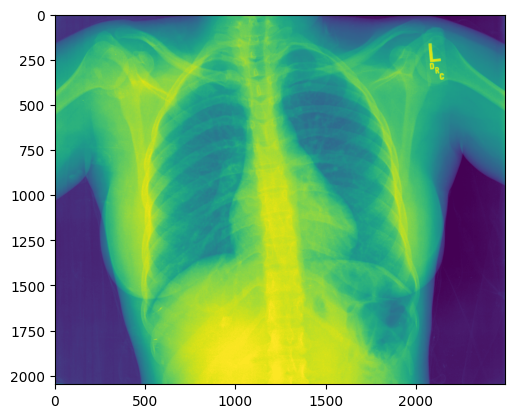

In [56]:
test_img=[]
for i, row in projections.iterrows():
    if(".dcm" in row['filename']):
        new_string=row['filename'].replace(".dcm","")
    else:
        new_string=row['filename']
    print(new_string)
    print(os.path.exists('./images/images_normalized/'+new_string))
    img=Image.open('./images/images_normalized/'+new_string)
    plt.imshow(img)
    test_img=img
    img=np.array(img)
    print('image size', img.shape)
    # img.show()
    break

In [57]:
import torchvision.transforms as transforms
resize=transforms.Resize(32)
new1=resize(test_img.convert('L'))
np.array(new1).shape

(32, 39)

In [59]:
np.array(test_img).shape

(2048, 2496)

In [28]:
clean_reports.shape

(3337, 8)

In [29]:
data=pd.read_csv('./clean_indiana_reports.csv')
data

,Unnamed: 0,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
3,4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
4,5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.
...,...,...,...,...,...,...,...,...,...
3332,3844,3993,Cardiomegaly/mild;Diaphragm/left/elevated,Cardiomegaly;Diaphragm,CHEST 2V FRONTAL/LATERAL,Edema,NaN,The heart is mildly enlarged. Left hemidiaphra...,Borderline cardiomegaly without acute disease.
3333,3845,3994,Cardiomegaly/mild;Pulmonary Congestion;Heart F...,Cardiomegaly;Pulmonary Congestion;Heart Failure,2 view ( PA and lateral) chest radiograph date...,"XXXX-year-old male with chest pain, positive t...","Portable chest x-XXXX XXXX, XXXX",Similar mild cardiomegaly. Of the pulmonary va...,Mild cardiomegaly with XXXX of early failure.
3334,3846,3995,Lung/hyperdistention/mild;Diaphragm/bilateral/...,Lung;Diaphragm;Cicatrix;Pulmonary Atelectasis;...,Xray Chest PA and Lateral,"Nausea, vomiting x2 weeks. Dialysis patient.","XXXX, XXXX.",The cardiomediastinal silhouette and pulmonary...,1. Interval resolution of bibasilar airspace d...
3335,3847,3996,Spine/degenerative,Spine,Xray Chest PA and Lateral,NaN,None.,The lungs are clear. Heart size is normal. No ...,Clear lungs. No acute cardiopulmonary abnormal...


In [30]:
clean_reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.


In [31]:
clean_reports.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
5,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.


In [32]:
clean_reports.to_csv('./clean_indiana_reports.csv',index=False)

In [33]:
dd1=pd.read_csv('./clean_indiana_reports.csv')
dd1.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
3,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.
4,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.


In [34]:
data=pd.read_csv('./clean_indiana_reports.csv')
projections=pd.read_csv('./indiana_projections.csv')
#merging to get images corresponding to uids
jdata=pd.merge(data,projections,on='uid')
jdata.shape

(6469, 10)

In [35]:
jdata.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
4,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,Frontal


In [36]:
dd1['report_length']=dd1['findings'].apply(lambda x: len(x))
dd1.head()


,uid,MeSH,Problems,image,indication,comparison,findings,impression,report_length
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,210
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,116
2,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,433
3,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.,323
4,6,normal,normal,"PA and Lateral Chest. XXXX, XXXX at XXXX",Evaluate for infection,"XXXX, XXXX",Heart size and mediastinal contour are within ...,No acute cardiopulmonary findings.,225


In [37]:
dd1['report_length'].describe()

count    3337.000000
mean      219.545100
std        98.348133
min        33.000000
25%       151.000000
50%       207.000000
75%       268.000000
max      1054.000000
Name: report_length, dtype: float64

In [38]:
find=jdata[jdata['filename']=='44_IM-2078-1001.dcm.png']['findings'].values
find

array(['The heart, pulmonary XXXX and mediastinum are within normal limits. There is no pleural effusion or pneumothorax. There is no focal air space opacity to suggest a pneumonia.'],
      dtype=object)

In [39]:
jdata.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression,filename,projection
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-4001.dcm.png,Frontal
1,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.,1_IM-0001-3001.dcm.png,Lateral
2,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-1001.dcm.png,Frontal
3,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.,2_IM-0652-2001.dcm.png,Lateral
4,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...,4_IM-2050-1001.dcm.png,Frontal


In [40]:
for i, row in jdata.iterrows():
    print(type(row['findings']))
    print(row['findings'])
    break

<class 'str'>
The cardiac silhouette and mediastinum size are within normal limits. There is no pulmonary edema. There is no focal consolidation. There are no XXXX of a pleural effusion. There is no evidence of pneumothorax.


In [41]:
jdata['findings'].value_counts()

findings
The heart is normal in size. The mediastinum is unremarkable. The lungs are clear.                                                                                                                                                                                                                                                                         98
The heart and lungs have XXXX XXXX in the interval. Both lungs are clear and expanded. Heart and mediastinum normal.                                                                                                                                                                                                                                       95
Heart size normal. Lungs are clear. XXXX are normal. No pneumonia, effusions, edema, pneumothorax, adenopathy, nodules or masses.                                                                                                                                                                  

In [42]:
jdata['indication'].value_counts()

indication
Chest pain                                                                235
XXXX                                                                      198
Chest pain.                                                               169
XXXX.                                                                     104
chest pain                                                                 85
                                                                         ... 
XXXX-year-old female, productive XXXX and dyspnea for one month.            1
XXXX-year-old with shortness of breath. Atelectasis versus infiltrate.      1
polyarticular arthritis                                                     1
worsening XXXX                                                              1
pt with XXXX, c/o pain r lower ribs                                         1
Name: count, Length: 2127, dtype: int64

In [43]:
#vocab size: 1544

In [44]:
jdata['report_length']

KeyError: 'report_length'

In [3]:
import torch
import torchvision.models as models

In [4]:
alexnet=models.alexnet(pretrained=True)

/home/ayushh/miniconda3/envs/myenv/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ayushh/miniconda3/envs/myenv/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

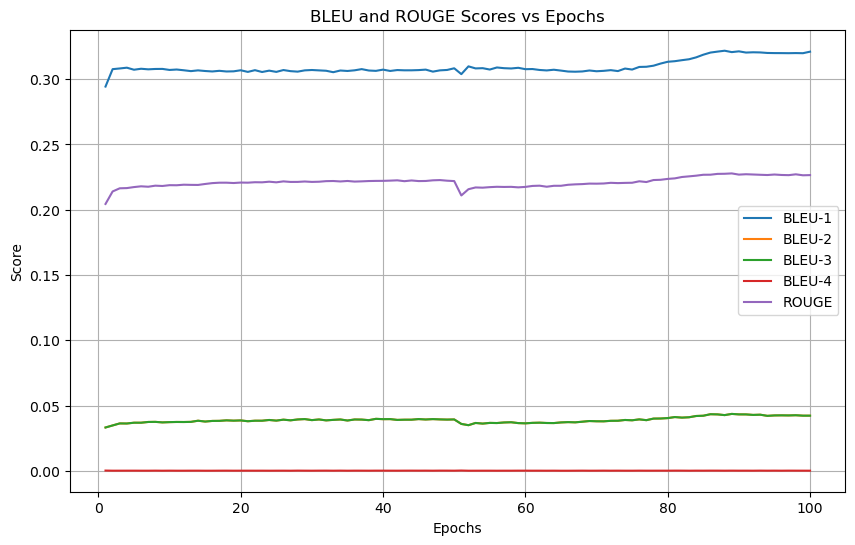

In [1]:
import matplotlib.pyplot as plt

# Read the log file
with open('logs_swin/logs_0.001_5e-6_128_0.5_1_16/training_results.txt', 'r') as file:
    log = file.readlines()

# Extracting scores from log
bleu1_scores = []
bleu2_scores = []
bleu3_scores = []
bleu4_scores = []
rouge_scores = []

for line in log:
    tokens = line.split()
    bleu1_scores.append(float(tokens[7]))
    bleu2_scores.append(float(tokens[8]))
    bleu3_scores.append(float(tokens[9]))
    bleu4_scores.append(float(tokens[10]))
    rouge_scores.append(float(tokens[11]))

# Plotting
epochs = range(1, len(log) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, bleu1_scores, label='BLEU-1')
plt.plot(epochs, bleu2_scores, label='BLEU-2')
plt.plot(epochs, bleu3_scores, label='BLEU-3')
plt.plot(epochs, bleu4_scores, label='BLEU-4')
plt.plot(epochs, rouge_scores, label='ROUGE')

plt.title('BLEU and ROUGE Scores vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

plt.show()


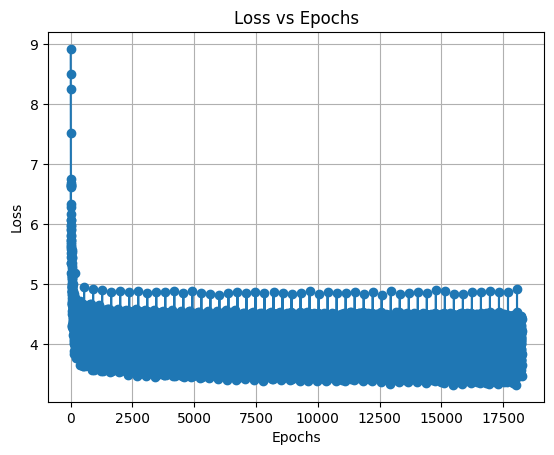

In [4]:
import matplotlib.pyplot as plt

def plot_loss_vs_epochs(log_file):
    epochs = []
    losses = []
    
    # Read the log file line by line
    with open(log_file, 'r') as file:
        for line in file:
            # Split each line by whitespace
            parts = line.split()
            if parts[0] == 'LOSS':
                # Extract loss value and convert it to float
                loss = float(parts[1])
                losses.append(loss)
                # Append the epoch number (assuming it's sequential)

    epochs=range(len(losses))
    
    # Plotting the loss vs epochs
    plt.plot(epochs, losses, marker='o')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

# Provide the path to your log file here
log_file = 'logs_swin/logs_0.001_5e-6_128_0.5_1_16/actor_critic_train_logs.txt'
plot_loss_vs_epochs(log_file)


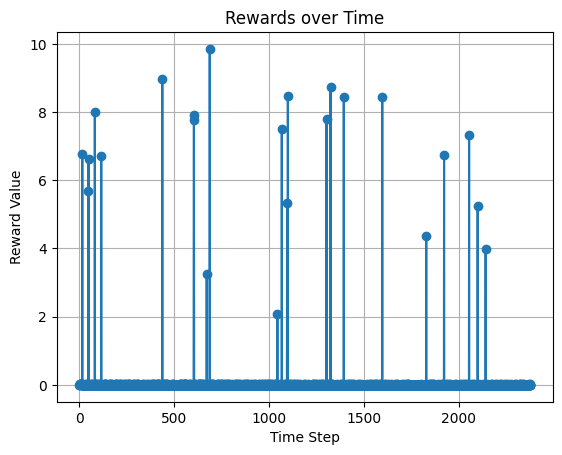

In [1]:
import re
import matplotlib.pyplot as plt
# Read logs from file
with open("/home/ayushh/actor-critic/dh602_project/logs_swin/logs_0.001_5e-6_128_0.3_1_64/actor_critic_train_reward_logs.txt", "r") as file:
    logs = file.readlines()
# Regular expression pattern to extract numerical reward values
pattern = r"tensor\(([\d.]+)"

# Extract rewards
rewards = []
for log in logs:
    match = re.search(pattern, log)
    if match:
        reward = float(match.group(1))
        rewards.append(reward)

# Plot rewards
plt.plot(rewards, marker='o')
plt.title('Rewards over Time')
plt.xlabel('Time Step')
plt.ylabel('Reward Value')
plt.grid(True)
plt.show()

In [ ]:
import json

def count_rouge_greater_than_zero(json_file):
    # Initialize count
    count = 0
    
    # Read the JSON file
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Iterate through each object in the array
    for obj in data:
        # Check if the "rouge" key exists and its value is greater than 0
        if "rouge" in obj and obj["rouge"] > 0:
            count += 1
    
    return count

# Example usage
json_file = "./predicted.json"  # Replace with the path to your JSON file
num_objects_with_rouge_gt_zero = count_rouge_greater_than_zero(json_file)
print("Number of objects with rouge greater than 0:", num_objects_with_rouge_gt_zero)


In [1]:
print(df_new)

NameError: name 'df_new' is not defined